In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
num_iters = 5

# Baseline at ra=0.1, dec=0.1

## OPD and WFS Zernikes

In [112]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop01ra01dec/'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer.1')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer.1')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [113]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 8 Text yticklabel objects>)

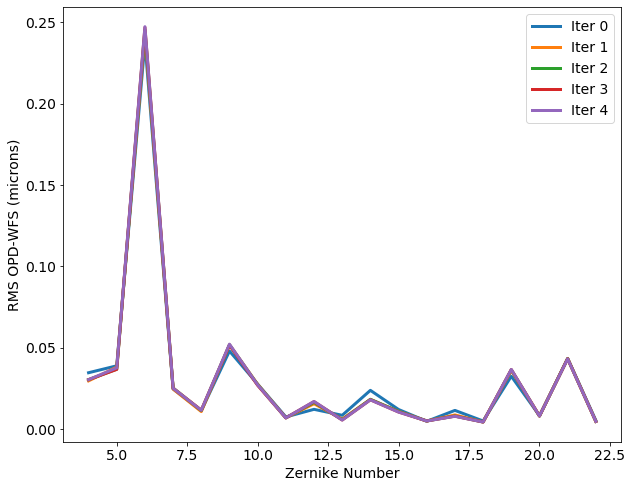

In [114]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

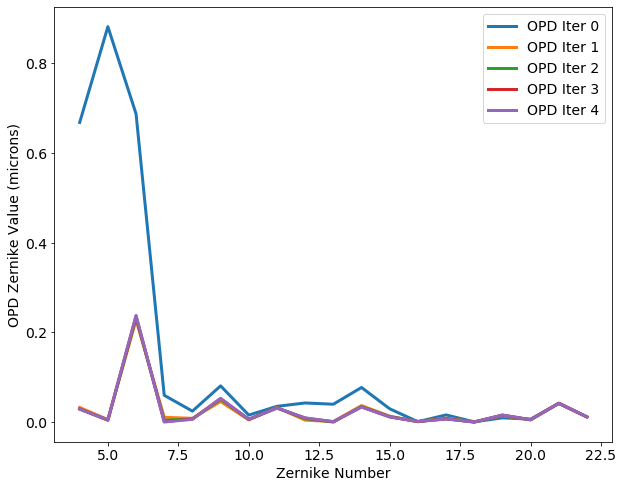

In [115]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [116]:
pssn_data = []
fwhm_data = []
#data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/iterTest_080620/outputFiles/'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

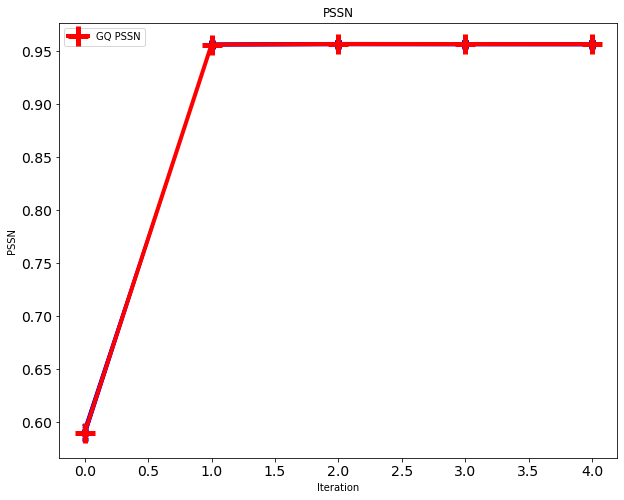

In [117]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

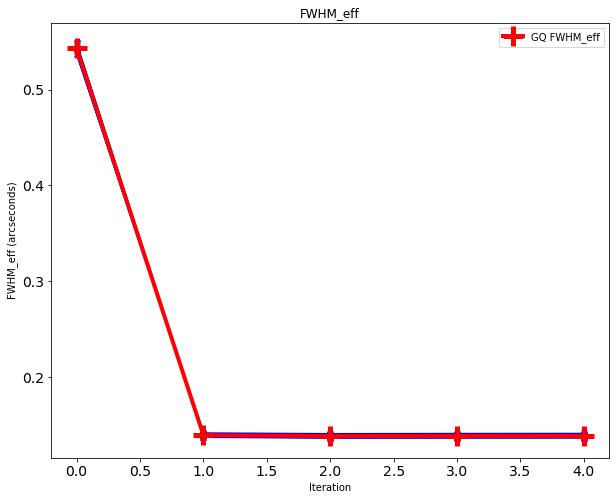

In [118]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

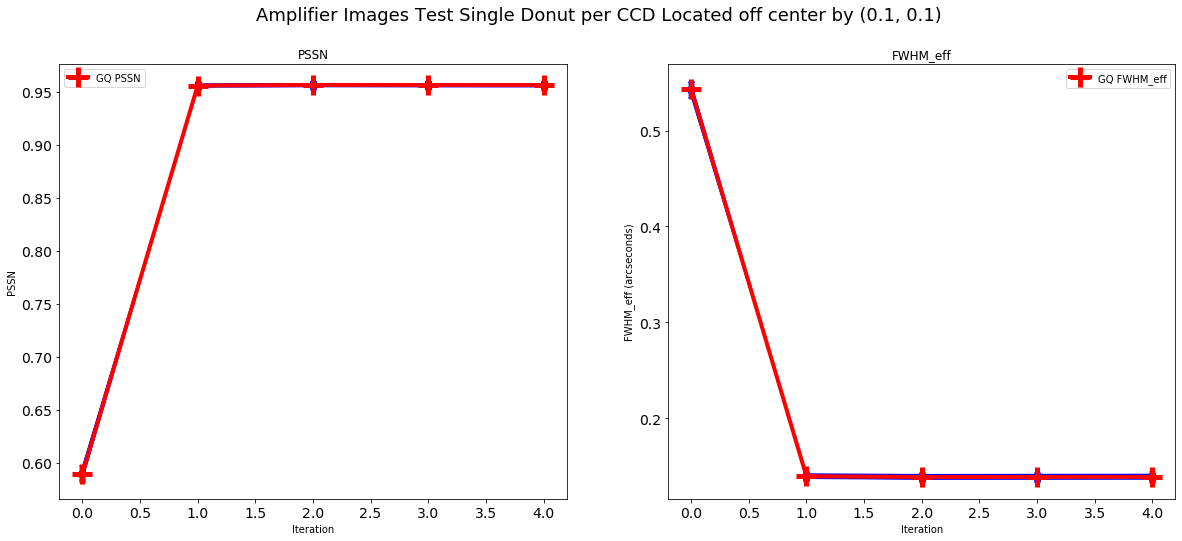

In [131]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Single Donut per CCD Located off center by (0.1, 0.1)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

## Timing Data

In [119]:
timing_dict_file = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineCloseLoop01ra01dec/close_loop_timing_dict.json'

In [120]:
import json
import pandas as pd
with open(timing_dict_file, 'r') as file:
    timing_dict = json.load(file)

In [121]:
timing_dict

{'totalIterTime': [1521.82044,
  1838.191533,
  1816.621405,
  1823.399995,
  1831.404487],
 'opdGen': [373.055906, 449.693309, 439.431857, 453.312672, 455.18716],
 'defocalGenExtra': [219.039777,
  317.934705,
  328.269349,
  328.478717,
  330.327301],
 'defocalGenIntra': [218.383326,
  319.864419,
  345.152107,
  346.44715,
  326.496906],
 'focalGen': [],
 'isrFocal': [18.191537, 10.724265, 13.223056, 15.337417, 13.280026],
 'ingestDefocal': [28.09498, 23.88349, 28.885548, 29.751199, 37.480707],
 'ingestFocal': [15.948239, 14.928984, 24.753121, 11.281224, 26.964255],
 'isrDefocal': [250.167842, 219.978387, 227.257463, 234.247783, 228.437616],
 'wfsEsti': [263.150643, 263.621578, 265.506228, 263.645562, 253.550966]}

In [122]:
timing_dict['focalGen'] = [0., 0., 0., 0., 0.]

In [123]:
timing_df = pd.DataFrame(timing_dict)

In [124]:
timing_means = timing_df.mean()/60.

In [125]:
def print_timing(mean_times):
    
    print("AVERAGE TIME PER LOOP (minutes)")
    print("totalIterTime\t {}".format(timing_means['totalIterTime']))
    print('\n')
    print('PHOSIM\n------')
    for label in ['opdGen', 'focalGen', 'defocalGenIntra', 'defocalGenExtra']:
        print('{}\t {}'.format(label, mean_times[label]))
    print('\nLSST STACK\n----------')
    for label in ['ingestFocal', 'ingestDefocal', 'isrFocal', 'isrDefocal']:
        print('{}\t {}'.format(label, mean_times[label]))        
    print('\nAOS CODE\n--------')
    print('wfsEsti\t {}'.format(mean_times['wfsEsti']))

In [126]:
print_timing(timing_means)

AVERAGE TIME PER LOOP (minutes)
totalIterTime	 29.4381262


PHOSIM
------
opdGen	 7.235603013333334
focalGen	 0.0
defocalGenIntra	 5.187813026666666
defocalGenExtra	 5.080166163333333

LSST STACK
----------
ingestFocal	 0.31291941
ingestDefocal	 0.49365307999999997
isrFocal	 0.2358543366666667
isrDefocal	 3.866963636666667

AOS CODE
--------
wfsEsti	 4.364916589999999


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text yticklabel objects>)

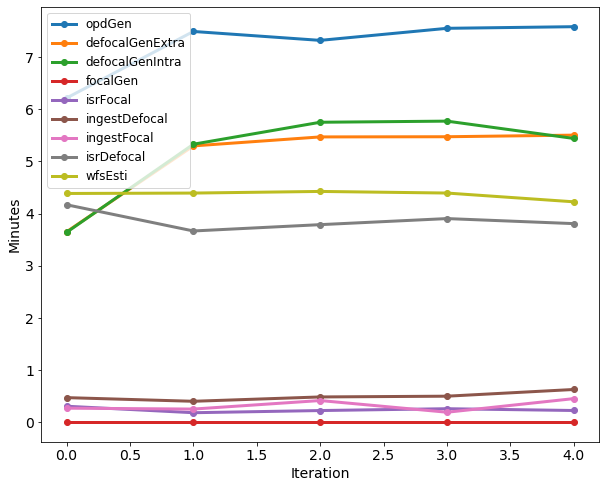

In [127]:
fig = plt.figure(figsize=(10, 8))
for key, value in timing_dict.items():
    if key != 'totalIterTime':
        plt.plot(np.arange(num_iters), np.array(value)/60., label=key, lw=3, marker='o')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

Text(0, 0.5, 'Minutes')

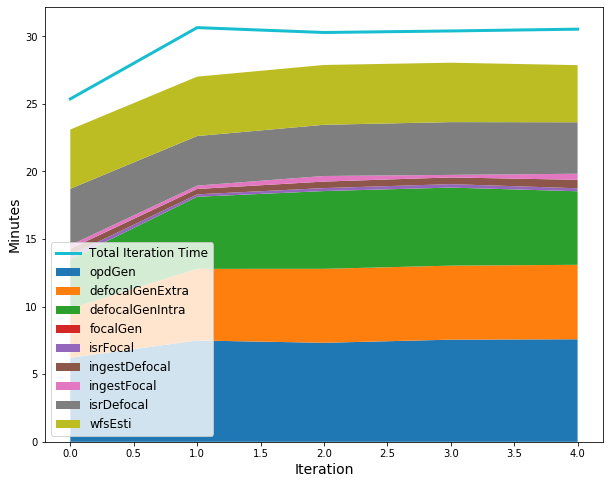

In [128]:
fig = plt.figure(figsize=(10, 8))
stack_keys = list(timing_dict.keys())
stack_keys.remove('totalIterTime')
y_data = [np.array(timing_dict[key])/60. for key in stack_keys]
plt.stackplot(np.arange(num_iters), y_data, labels=stack_keys)
plt.plot(np.arange(num_iters), np.array(timing_dict['totalIterTime'])/60., 
         lw=3, c='C9', label='Total Iteration Time')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)

In [70]:
num_iters = 5

# Baseline at ra=0, dec=0

## OPD and WFS Zernikes

In [132]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/masterBranchCloseLoop'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [133]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text yticklabel objects>)

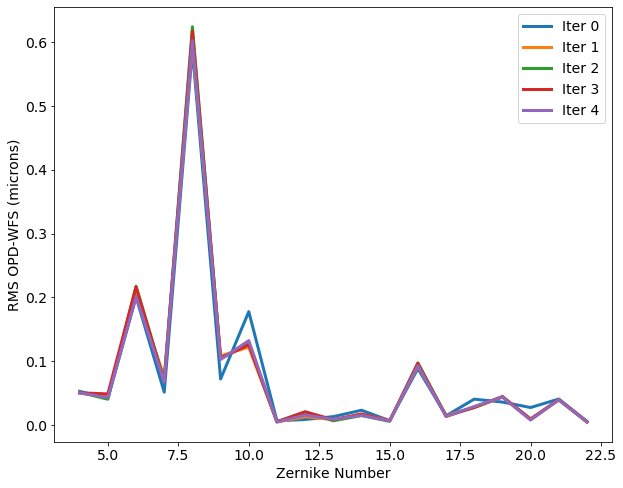

In [134]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

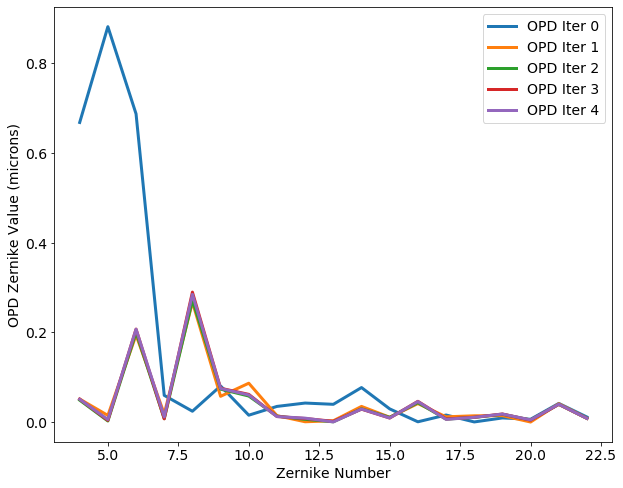

In [135]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

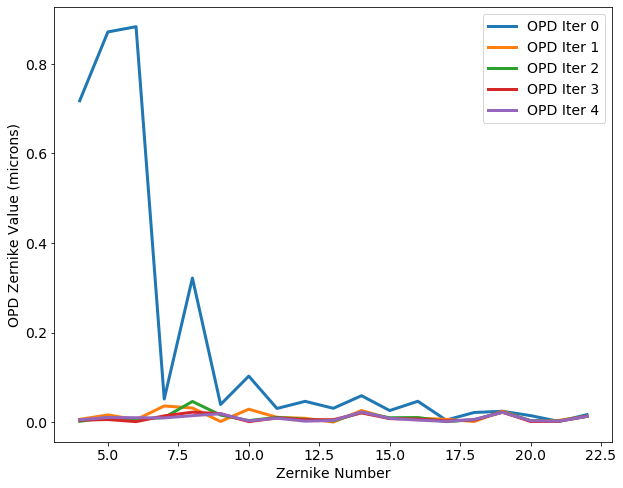

In [136]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(wfs_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [137]:
pssn_data = []
fwhm_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/masterBranchCloseLoop'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <a list of 9 Text yticklabel objects>)

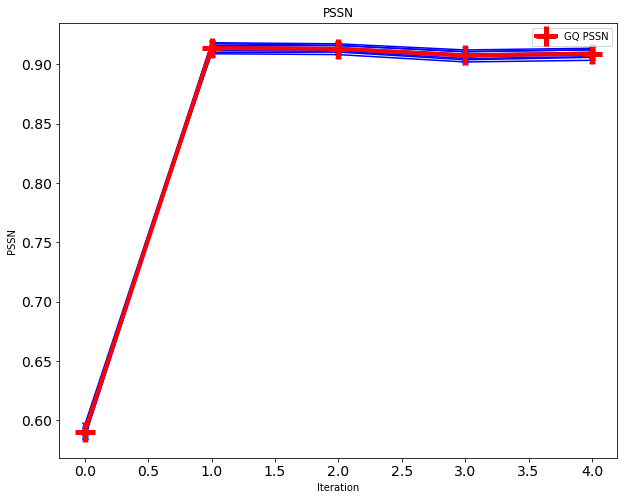

In [138]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <a list of 10 Text yticklabel objects>)

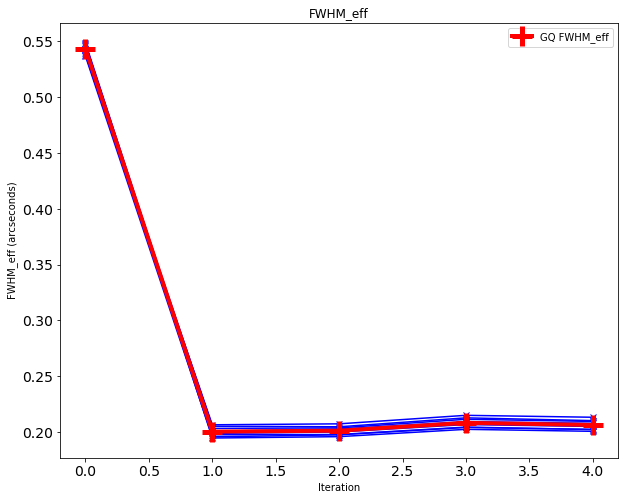

In [139]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <a list of 10 Text yticklabel objects>)

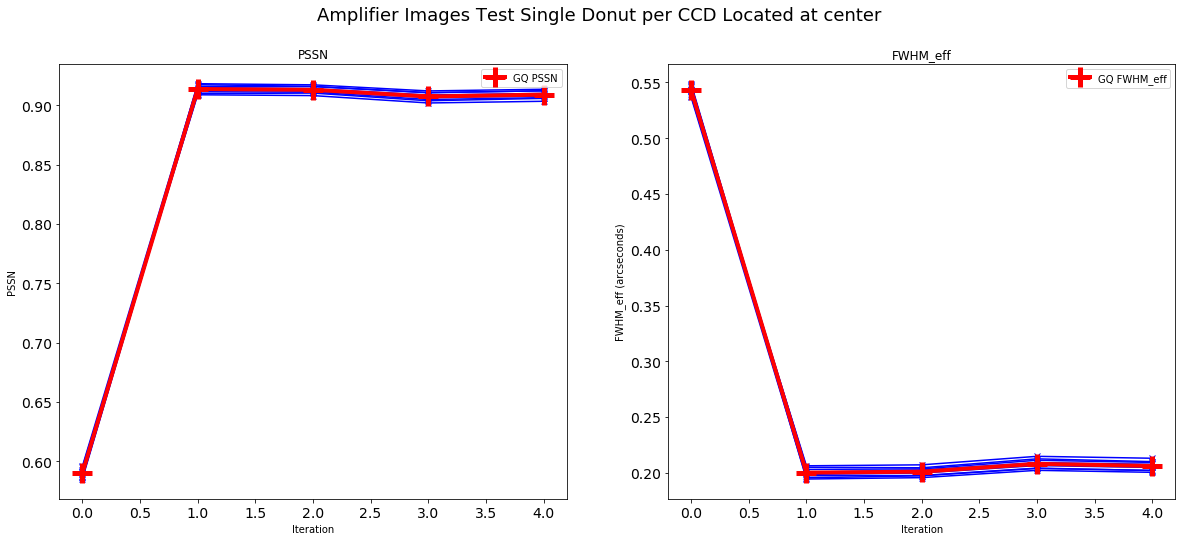

In [140]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Single Donut per CCD Located at center', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

# Baseline at ra=0, dec=0 (rerun with new `phosim_utils` update as of 9/3/20)

## OPD and WFS Zernikes

In [228]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/baselineLoops/090320'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer.1')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer.1')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [229]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]),
 <a list of 10 Text yticklabel objects>)

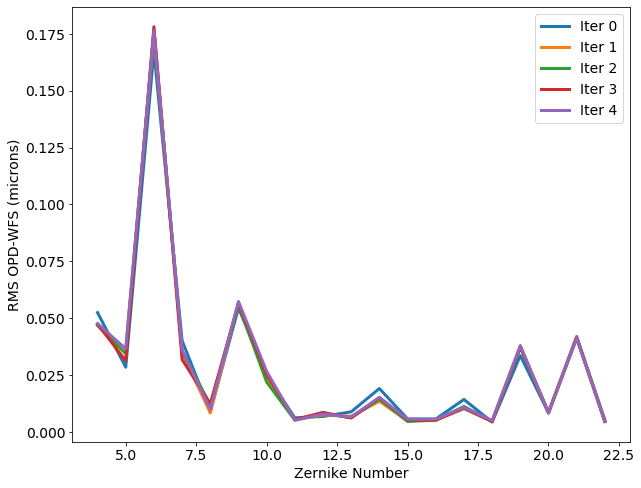

In [230]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

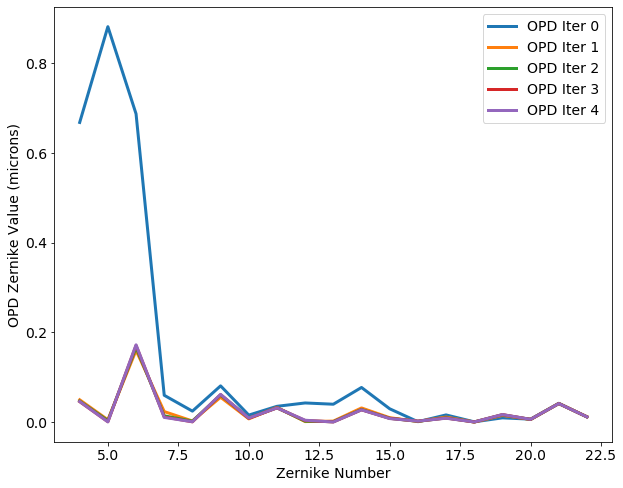

In [231]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

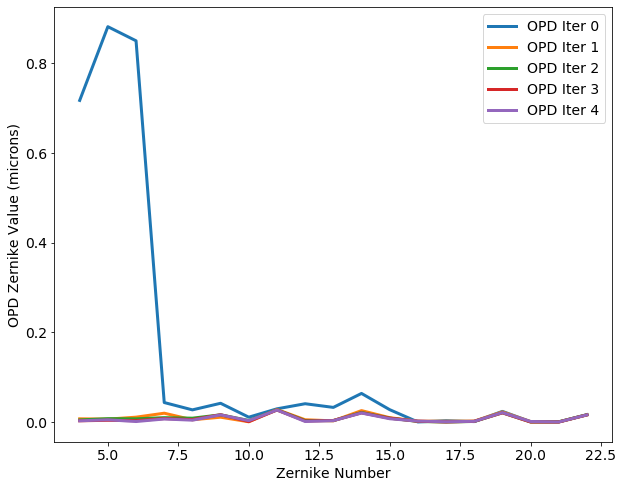

In [232]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(wfs_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [233]:
pssn_data = []
fwhm_data = []
#data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/masterBranchCloseLoop'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

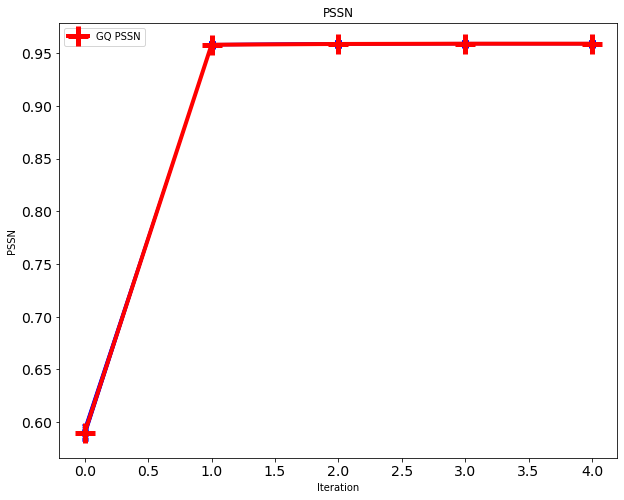

In [234]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

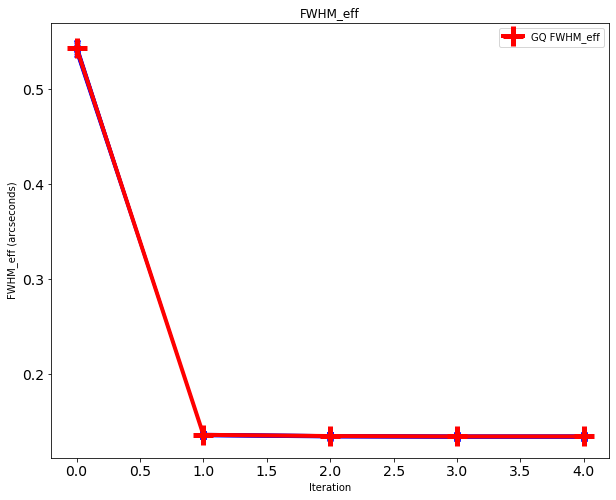

In [235]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

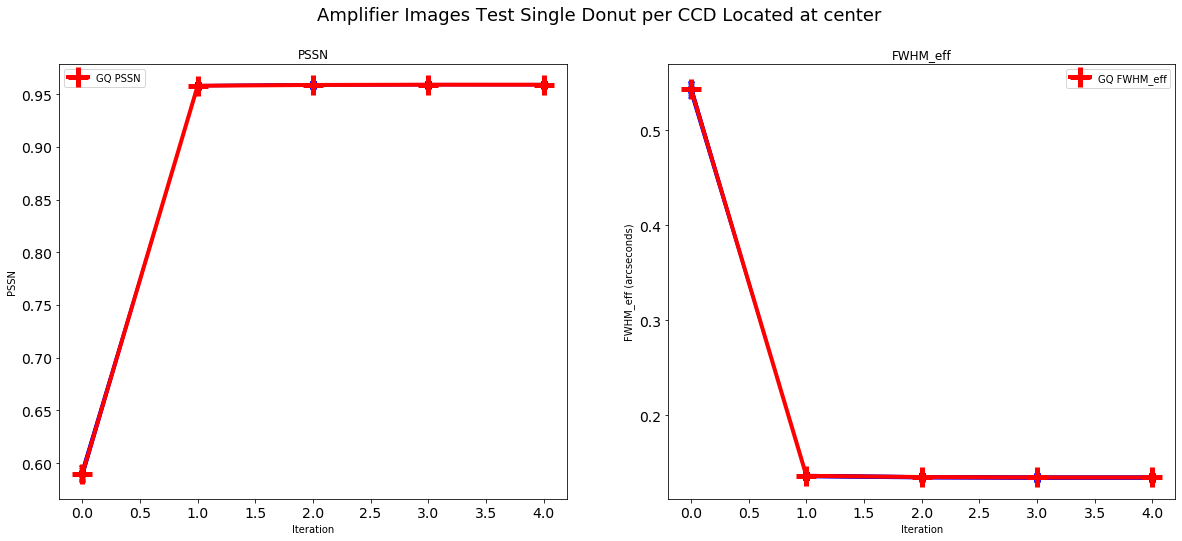

In [236]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Single Donut per CCD Located at center', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

In [81]:
num_iters = 5

# Baseline w/ EImages

## OPD and WFS Zernikes

In [82]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/masterBranchCloseLoopEimg/'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [83]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]),
 <a list of 10 Text yticklabel objects>)

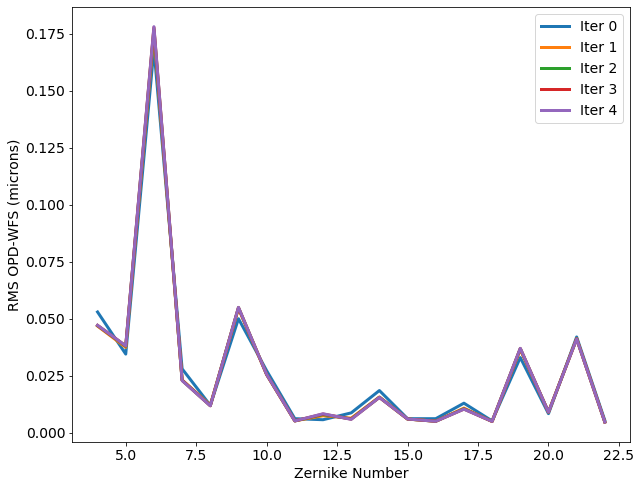

In [84]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

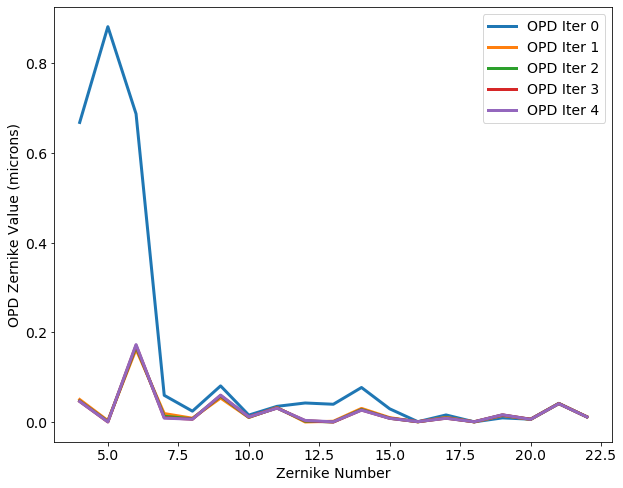

In [85]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [86]:
pssn_data = []
fwhm_data = []
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

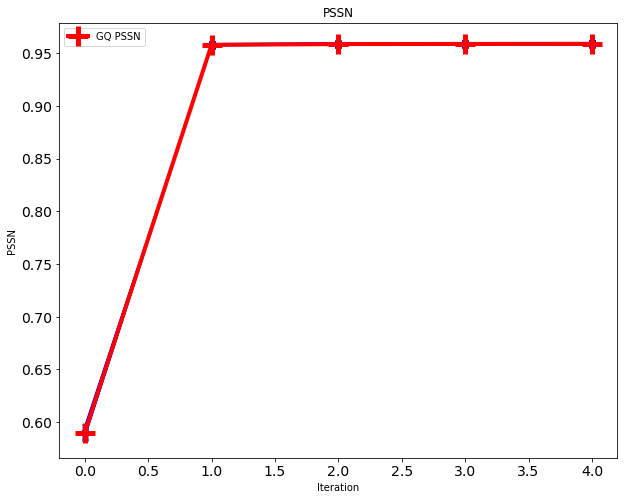

In [87]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

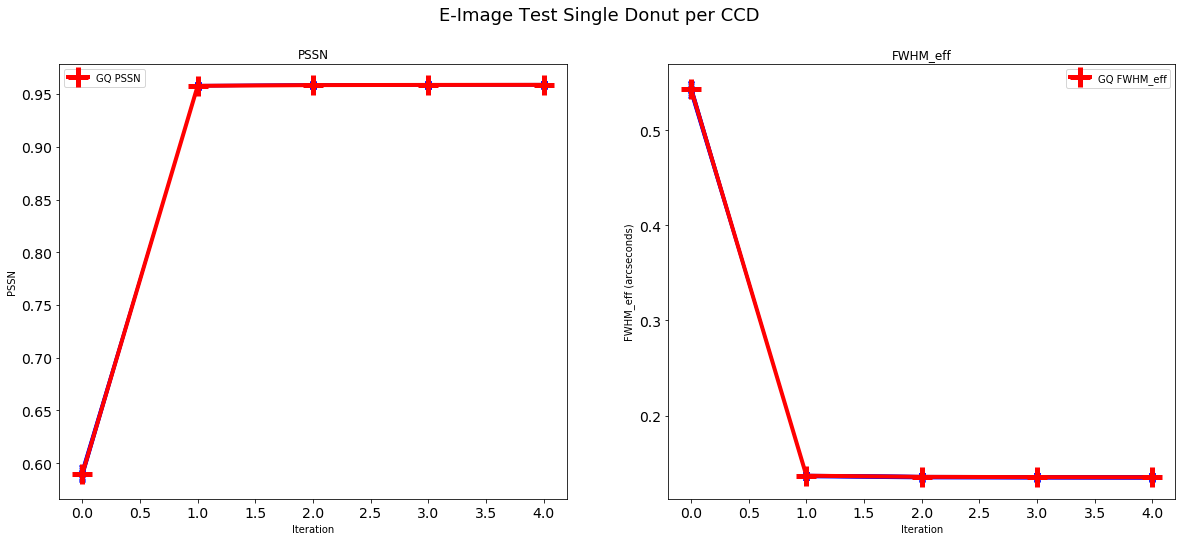

In [94]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('E-Image Test Single Donut per CCD', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

# Running on Gaia High Galactic Latitude catalog

Truncated sources at 11th magnitude to save time. Also set this to be max magnitude in Filter.py

## RefCat Matching Turned On but No Deblending

## OPD and WFS Zernikes

In [197]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaHighClosedLoop/noDeblending/refCat/082120'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer.1')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer.1')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [198]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 <a list of 10 Text yticklabel objects>)

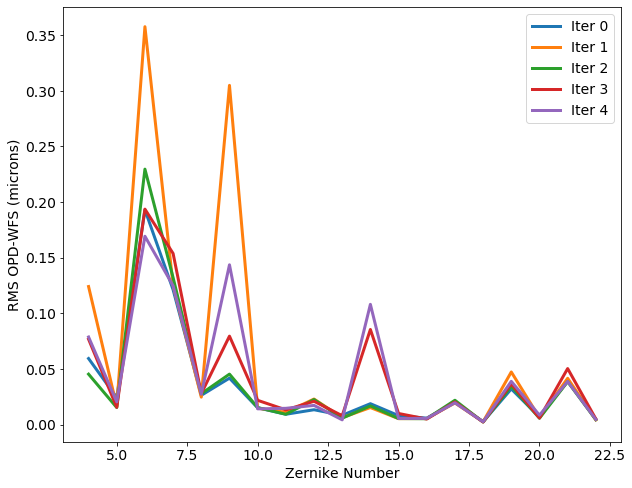

In [199]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

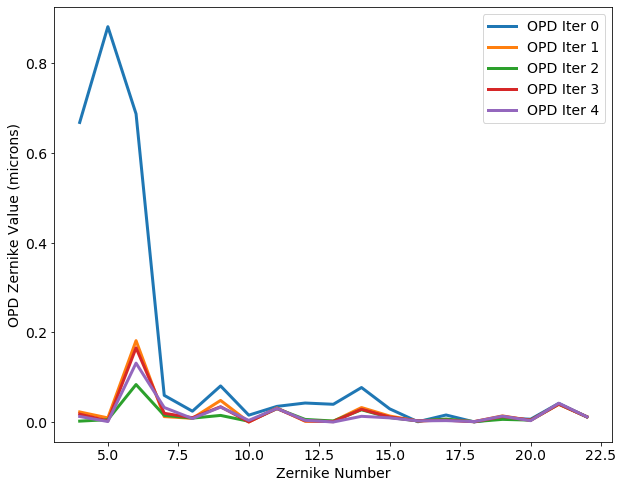

In [200]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [201]:
pssn_data = []
fwhm_data = []
#data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/iterTest_080620/outputFiles/'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

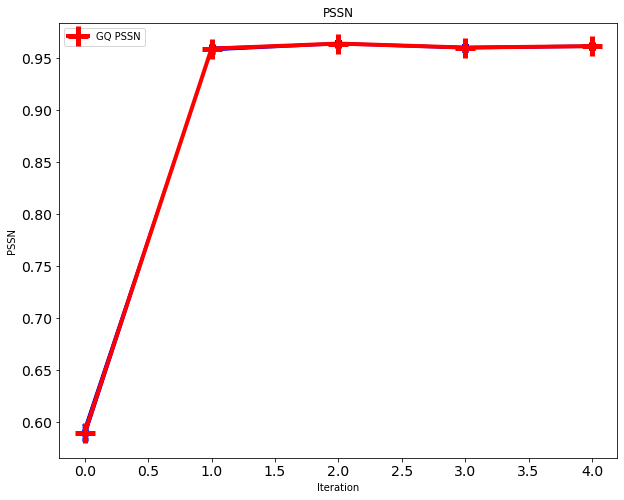

In [202]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

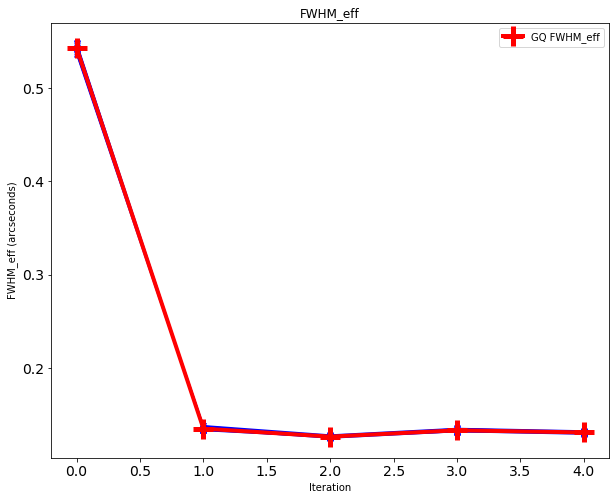

In [203]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

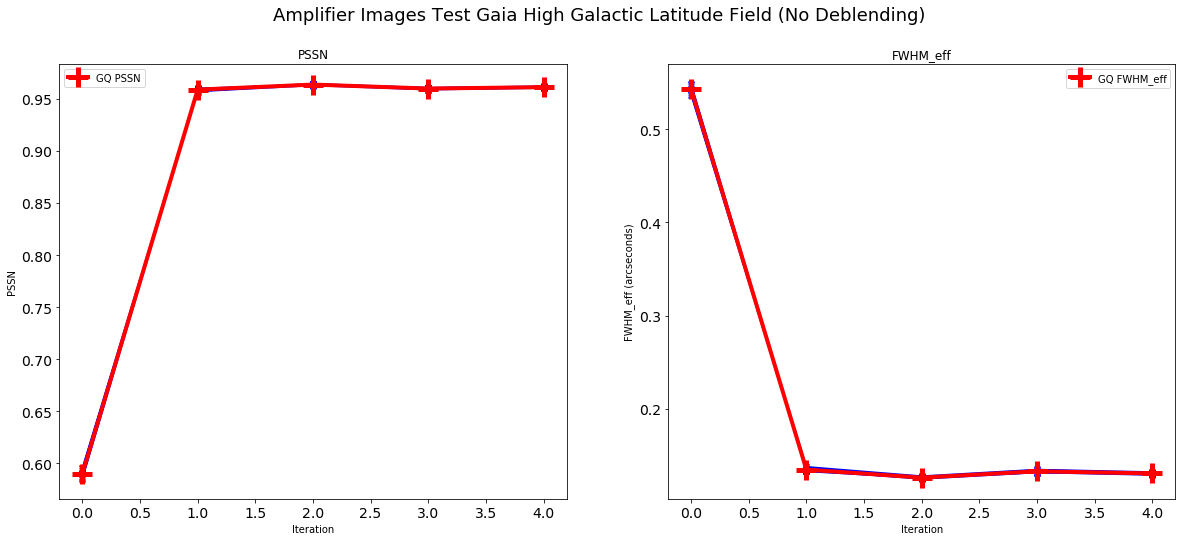

In [204]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Gaia High Galactic Latitude Field (No Deblending)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

## Timing Data

In [205]:
timing_dict_file = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaHighClosedLoop/noDeblending/refCat/082120/close_loop_timing_dict.json'

In [216]:
import json
import pandas as pd
with open(timing_dict_file, 'r') as file:
    timing_dict = json.load(file)

In [217]:
timing_dict

{'totalIterTime': [1791.645933,
  8278.147384,
  8345.309028,
  8317.083321,
  8287.890463],
 'opdGen': [427.120527, 430.702652, 433.214299, 431.713888],
 'defocalGenExtra': [2988.20683, 2991.719211, 2995.558332, 2958.654348],
 'defocalGenIntra': [2969.35626, 2999.592724, 2980.062128, 2985.770345],
 'focalGen': [],
 'isrFocal': [12.716698, 10.477971, 10.254304, 10.769938, 10.419892],
 'ingestDefocal': [20.093655, 20.388894, 21.558456, 21.974838, 21.938097],
 'ingestFocal': [16.395061, 11.353139, 10.988187, 9.840405, 10.619774],
 'isrDefocal': [178.8849, 194.378619, 191.239811, 189.894206, 190.457826],
 'wfsEsti': [1435.350293, 1429.802498, 1436.625685, 1434.013133, 1432.553819]}

In [218]:
timing_dict['focalGen'] = [0., 0., 0., 0., 0.]
timing_dict['defocalGenExtra'].insert(0, 0.)
timing_dict['defocalGenIntra'].insert(0, 0.)
timing_dict['opdGen'].insert(0, 0.)

In [219]:
timing_df = pd.DataFrame(timing_dict)

In [220]:
timing_means = timing_df.mean()/60.

In [221]:
def print_timing(mean_times):
    
    print("AVERAGE TIME PER LOOP (minutes)")
    print("totalIterTime\t {}".format(timing_means['totalIterTime']))
    print('\n')
    print('PHOSIM\n------')
    for label in ['opdGen', 'focalGen', 'defocalGenIntra', 'defocalGenExtra']:
        print('{}\t {}'.format(label, mean_times[label]))
    print('\nLSST STACK\n----------')
    for label in ['ingestFocal', 'ingestDefocal', 'isrFocal', 'isrDefocal']:
        print('{}\t {}'.format(label, mean_times[label]))        
    print('\nAOS CODE\n--------')
    print('wfsEsti\t {}'.format(mean_times['wfsEsti']))

In [222]:
print_timing(timing_means)

AVERAGE TIME PER LOOP (minutes)
totalIterTime	 116.73358709666665


PHOSIM
------
opdGen	 5.742504553333333
focalGen	 0.0
defocalGenIntra	 39.78260485666667
defocalGenExtra	 39.78046240333334

LSST STACK
----------
ingestFocal	 0.19732188666666667
ingestDefocal	 0.3531798
isrFocal	 0.18212934333333333
isrDefocal	 3.149517873333333

AOS CODE
--------
wfsEsti	 23.89448476


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text yticklabel objects>)

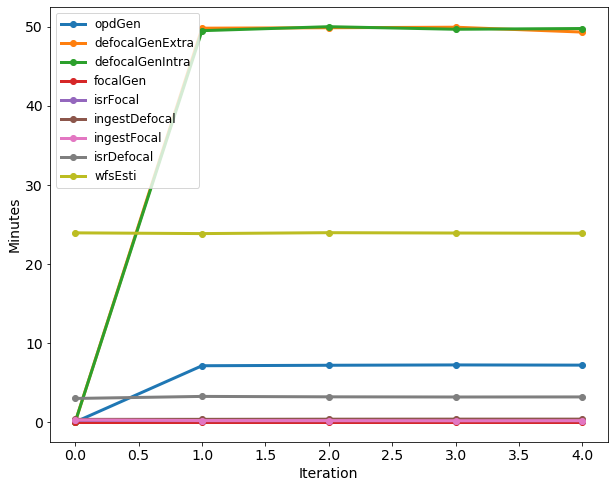

In [223]:
fig = plt.figure(figsize=(10, 8))
for key, value in timing_dict.items():
    if key != 'totalIterTime':
        plt.plot(np.arange(num_iters), np.array(value)/60., label=key, lw=3, marker='o')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

Text(0, 0.5, 'Minutes')

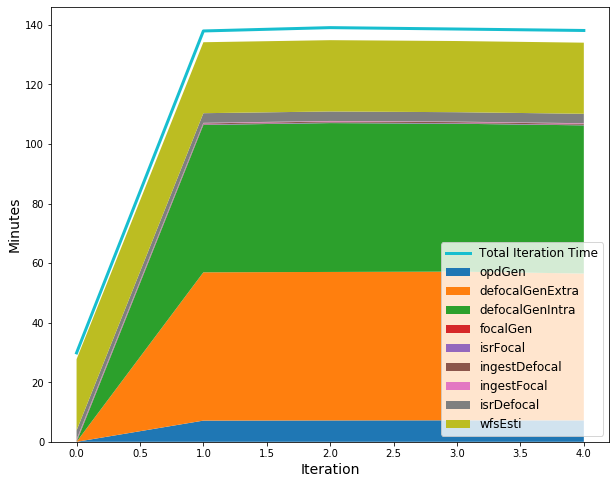

In [224]:
fig = plt.figure(figsize=(10, 8))
stack_keys = list(timing_dict.keys())
stack_keys.remove('totalIterTime')
y_data = [np.array(timing_dict[key])/60. for key in stack_keys]
plt.stackplot(np.arange(num_iters), y_data, labels=stack_keys)
plt.plot(np.arange(num_iters), np.array(timing_dict['totalIterTime'])/60., 
         lw=3, c='C9', label='Total Iteration Time')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)

# Running on Gaia Medium Galactic Latitude catalog

Truncated sources at 11th magnitude to save time. Also set this to be max magnitude in Filter.py

## RefCat Matching Turned On but No Deblending and Only Isolated Donuts

## OPD and WFS Zernikes

In [3]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaMedClosedLoop/noDeblending/refCat/090320/'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer.1')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer.1')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [4]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 8 Text yticklabel objects>)

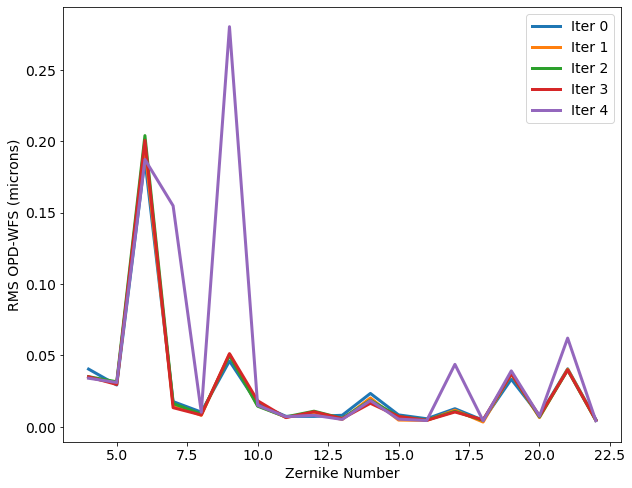

In [5]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

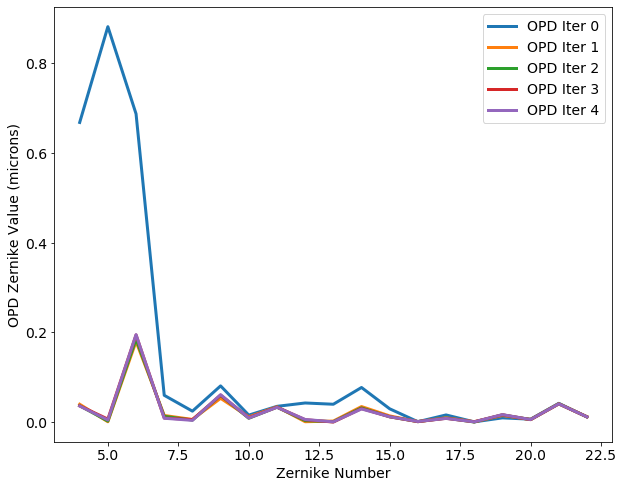

In [6]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [7]:
pssn_data = []
fwhm_data = []
#data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/iterTest_080620/outputFiles/'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

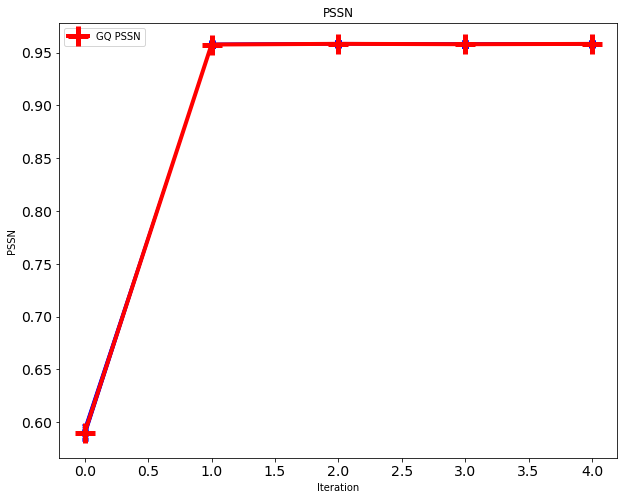

In [8]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

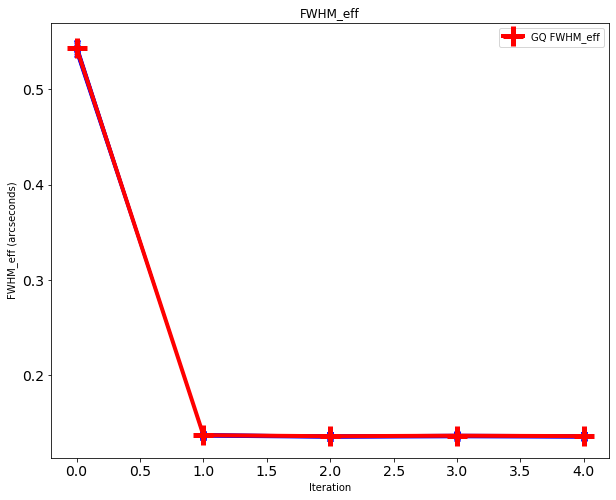

In [9]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

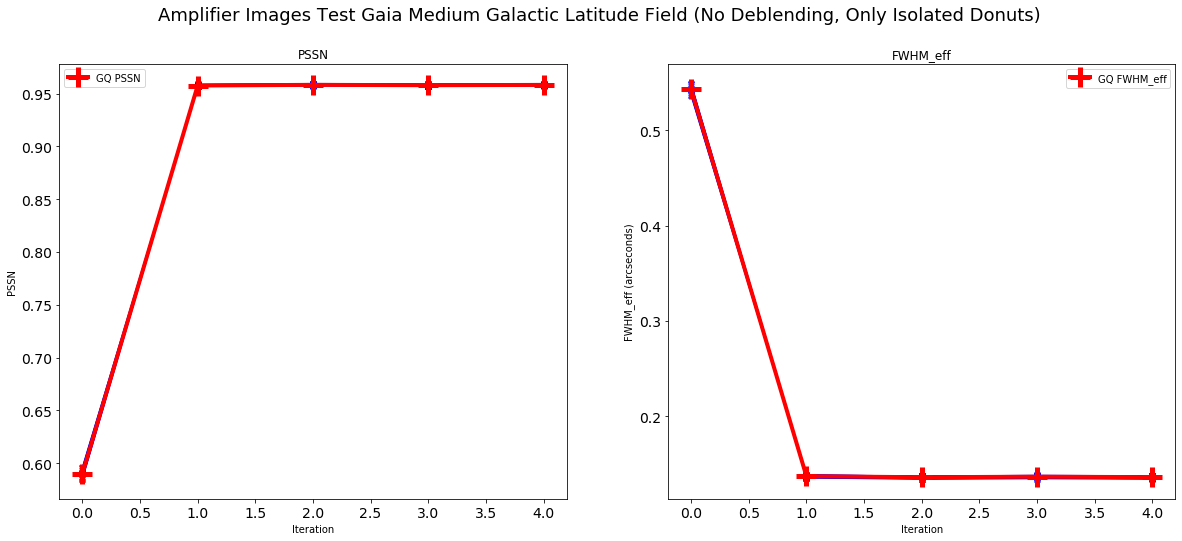

In [11]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Gaia Medium Galactic Latitude Field (No Deblending, Only Isolated Donuts)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

## Timing Data

In [12]:
timing_dict_file = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaMedClosedLoop/noDeblending/refCat/090320/close_loop_timing_dict.json'

In [13]:
import json
import pandas as pd
with open(timing_dict_file, 'r') as file:
    timing_dict = json.load(file)

In [14]:
timing_dict

{'totalIterTime': [998.759874,
  14702.205233,
  15008.147188,
  15010.290553,
  14919.135418],
 'opdGen': [173.023344, 438.076529, 437.516363, 436.876089],
 'defocalGenExtra': [6747.382435, 6790.361653, 6718.371158, 6716.560415],
 'defocalGenIntra': [6701.1529, 6694.195402, 6745.917122, 6680.465544],
 'focalGen': [],
 'isrFocal': [10.378162, 10.495596, 9.919265, 10.10554, 10.545708],
 'ingestDefocal': [21.309546, 20.379085, 23.992396, 20.956845, 20.122852],
 'ingestFocal': [17.600468, 12.04022, 9.508876, 11.330182, 11.368838],
 'isrDefocal': [181.88698, 191.121199, 191.566817, 192.513151, 192.782176],
 'wfsEsti': [607.890721, 607.903614, 605.684043, 631.810725, 607.848159]}

In [15]:
timing_dict['focalGen'] = [0., 0., 0., 0., 0.]
timing_dict['defocalGenExtra'].insert(0, 0.)
timing_dict['defocalGenIntra'].insert(0, 0.)
timing_dict['opdGen'].insert(0, 0.)

In [16]:
timing_df = pd.DataFrame(timing_dict)

In [17]:
timing_means = timing_df.mean()/60.

In [18]:
def print_timing(mean_times):
    
    print("AVERAGE TIME PER LOOP (minutes)")
    print("totalIterTime\t {}".format(timing_means['totalIterTime']))
    print('\n')
    print('PHOSIM\n------')
    for label in ['opdGen', 'focalGen', 'defocalGenIntra', 'defocalGenExtra']:
        print('{}\t {}'.format(label, mean_times[label]))
    print('\nLSST STACK\n----------')
    for label in ['ingestFocal', 'ingestDefocal', 'isrFocal', 'isrDefocal']:
        print('{}\t {}'.format(label, mean_times[label]))        
    print('\nAOS CODE\n--------')
    print('wfsEsti\t {}'.format(mean_times['wfsEsti']))

In [19]:
print_timing(timing_means)

AVERAGE TIME PER LOOP (minutes)
totalIterTime	 202.12846088666666


PHOSIM
------
opdGen	 4.9516410833333335
focalGen	 0.0
defocalGenIntra	 89.40576989333334
defocalGenExtra	 89.90891887000001

LSST STACK
----------
ingestFocal	 0.20616194666666668
ingestDefocal	 0.35586908
isrFocal	 0.17148090333333332
isrDefocal	 3.1662344099999995

AOS CODE
--------
wfsEsti	 10.203790873333334


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

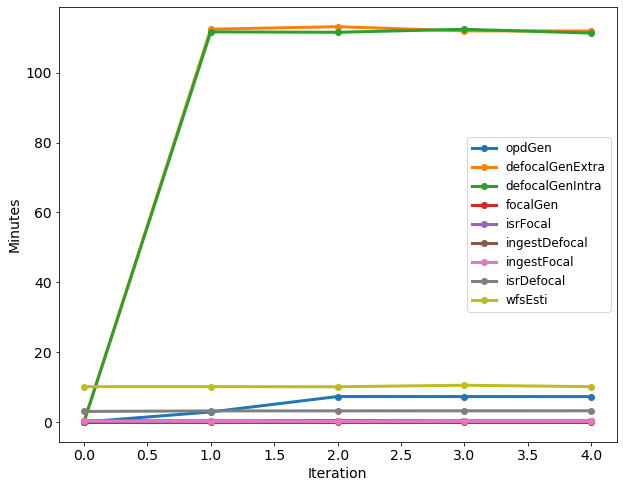

In [20]:
fig = plt.figure(figsize=(10, 8))
for key, value in timing_dict.items():
    if key != 'totalIterTime':
        plt.plot(np.arange(num_iters), np.array(value)/60., label=key, lw=3, marker='o')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

Text(0, 0.5, 'Minutes')

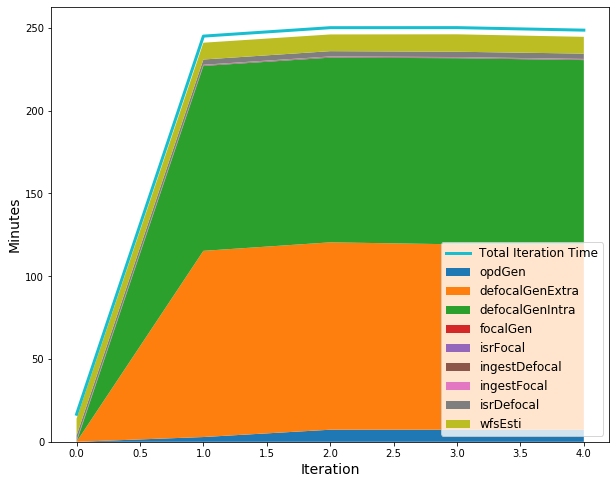

In [21]:
fig = plt.figure(figsize=(10, 8))
stack_keys = list(timing_dict.keys())
stack_keys.remove('totalIterTime')
y_data = [np.array(timing_dict[key])/60. for key in stack_keys]
plt.stackplot(np.arange(num_iters), y_data, labels=stack_keys)
plt.plot(np.arange(num_iters), np.array(timing_dict['totalIterTime'])/60., 
         lw=3, c='C9', label='Total Iteration Time')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)

## RefCat Matching Turned On but No Deblending and Donuts >= 2 mag brighter than neighbor

## OPD and WFS Zernikes

In [22]:
opd_data = []
wfs_data = []
data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaMedClosedLoop/noDeblending/refCat/091820_2mag_diff/'
for iterNum in range(num_iters):
    opd_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/opd.zer.1')
    wfs_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/wfs.zer.1')
    opd_data.append(np.genfromtxt(opd_filename))
    wfs_data.append(np.genfromtxt(wfs_filename))
opd_data = np.array(opd_data)
wfs_data = np.array(wfs_data)

In [23]:
def calc_errors(opd, wfs):
    return np.sqrt(np.mean((opd - wfs)**2., axis=0))

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ,  0.225]),
 <a list of 11 Text yticklabel objects>)

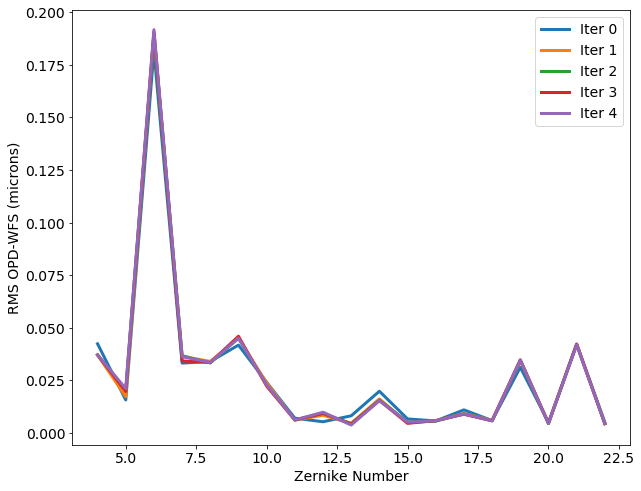

In [24]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             calc_errors(opd_data[i], wfs_data[i]), label='Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('RMS OPD-WFS (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

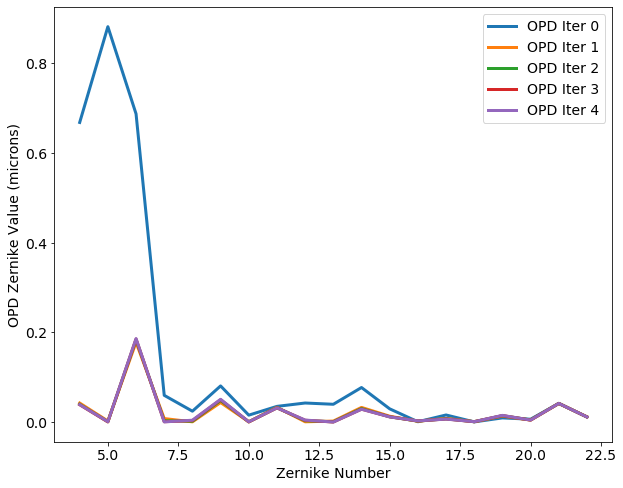

In [25]:
fig = plt.figure(figsize=(10, 8))
for i in range(num_iters):
    plt.plot(np.arange(4, 23), 
             np.abs(np.mean(opd_data[i], axis=0)), label='OPD Iter {}'.format(i), lw=3)
plt.legend(fontsize=14)
plt.xlabel('Zernike Number', size=14)
plt.ylabel('OPD Zernike Value (microns)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

## PSSN and FWHM Data

In [26]:
pssn_data = []
fwhm_data = []
#data_path = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/iterTest_080620/outputFiles/'
for iterNum in range(num_iters):
    pssn_filename = os.path.join(data_path, 'iter%i' % iterNum, 'img/PSSN.txt')
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

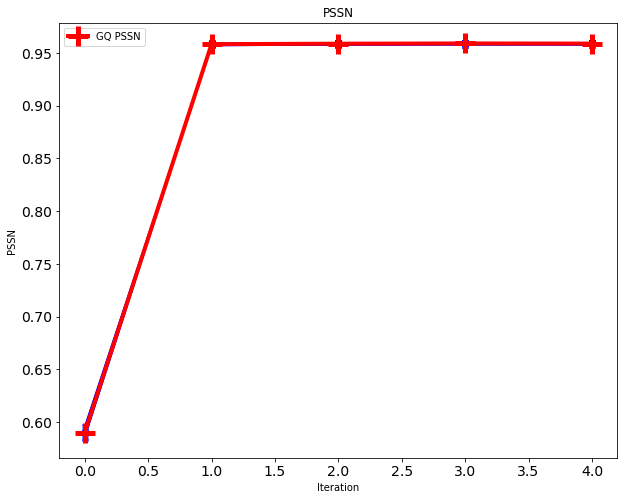

In [27]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

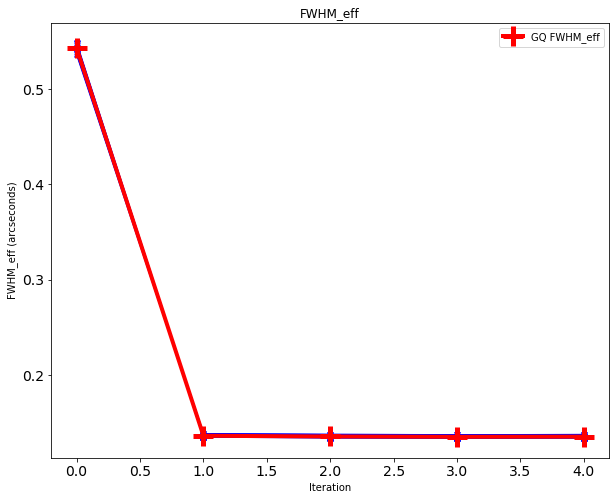

In [28]:
fig = plt.figure(figsize=(10, 8))
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), <a list of 6 Text yticklabel objects>)

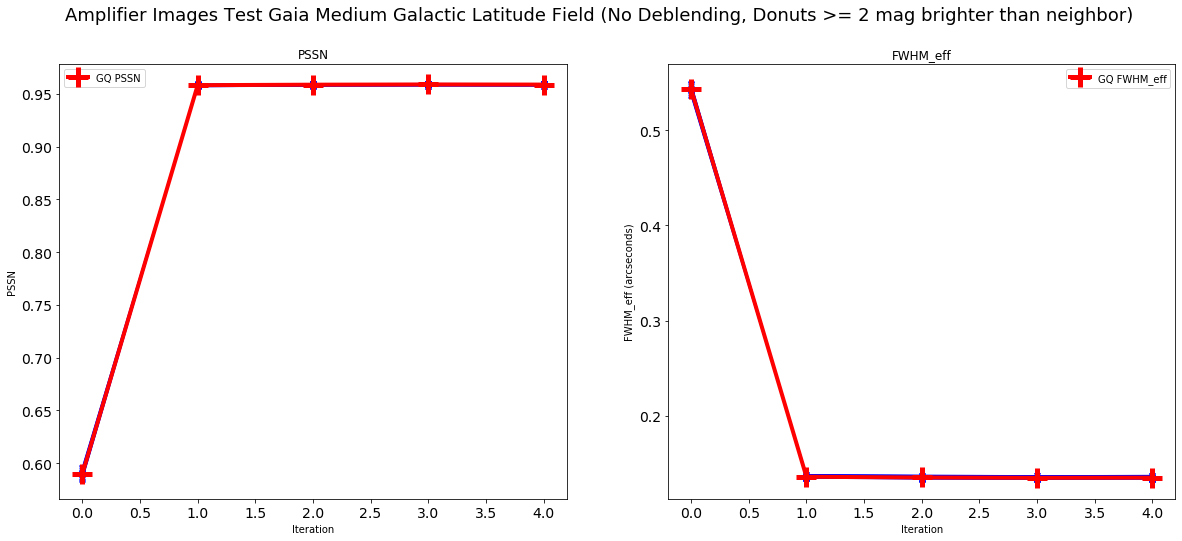

In [30]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(1,2,1)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), pssn_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('PSSN')
plt.title('PSSN')
plt.xticks(size=14)
plt.yticks(size=14)

fig.add_subplot(1,2,2)
num_ccds = 9
for i in range(num_ccds):
    plt.plot(np.arange(num_iters), fwhm_data[:,i], c='b', marker='x')
plt.plot(np.arange(num_iters), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('FWHM_eff (arcseconds)')
plt.title('FWHM_eff')
plt.suptitle('Amplifier Images Test Gaia Medium Galactic Latitude Field (No Deblending, Donuts >= 2 mag brighter than neighbor)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

## Timing Data

In [31]:
timing_dict_file = '/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/gaiaMedClosedLoop/noDeblending/refCat/091820_2mag_diff/close_loop_timing_dict.json'

In [32]:
import json
import pandas as pd
with open(timing_dict_file, 'r') as file:
    timing_dict = json.load(file)

In [33]:
timing_dict

{'totalIterTime': [4608.893351,
  18309.867813,
  18600.332174,
  18586.711467,
  18611.299847],
 'opdGen': [170.860633, 434.982802, 435.608298, 435.268586],
 'defocalGenExtra': [6740.364427, 6723.414108, 6710.587513, 6718.525912],
 'defocalGenIntra': [6710.156973, 6759.433022, 6723.421498, 6749.365866],
 'focalGen': [],
 'isrFocal': [10.528358, 10.441981, 10.602275, 11.177962, 10.44907],
 'ingestDefocal': [20.786116, 20.525945, 21.232729, 23.4667, 22.77048],
 'ingestFocal': [18.877352, 11.565889, 11.265908, 8.608804, 10.669942],
 'isrDefocal': [207.910581, 190.599543, 193.378504, 193.335682, 195.602739],
 'wfsEsti': [4190.115245, 4193.064074, 4188.240931, 4193.764577, 4191.2524]}

In [34]:
timing_dict['focalGen'] = [0., 0., 0., 0., 0.]
timing_dict['defocalGenExtra'].insert(0, 0.)
timing_dict['defocalGenIntra'].insert(0, 0.)
timing_dict['opdGen'].insert(0, 0.)

In [35]:
timing_df = pd.DataFrame(timing_dict)

In [36]:
timing_means = timing_df.mean()/60.

In [37]:
def print_timing(mean_times):
    
    print("AVERAGE TIME PER LOOP (minutes)")
    print("totalIterTime\t {}".format(timing_means['totalIterTime']))
    print('\n')
    print('PHOSIM\n------')
    for label in ['opdGen', 'focalGen', 'defocalGenIntra', 'defocalGenExtra']:
        print('{}\t {}'.format(label, mean_times[label]))
    print('\nLSST STACK\n----------')
    for label in ['ingestFocal', 'ingestDefocal', 'isrFocal', 'isrDefocal']:
        print('{}\t {}'.format(label, mean_times[label]))        
    print('\nAOS CODE\n--------')
    print('wfsEsti\t {}'.format(mean_times['wfsEsti']))

In [38]:
print_timing(timing_means)

AVERAGE TIME PER LOOP (minutes)
totalIterTime	 262.39034884


PHOSIM
------
opdGen	 4.922401063333334
focalGen	 0.0
defocalGenIntra	 89.80792453
defocalGenExtra	 89.64297320000001

LSST STACK
----------
ingestFocal	 0.20329298333333332
ingestDefocal	 0.3626065666666667
isrFocal	 0.17733215333333335
isrDefocal	 3.269423496666667

AOS CODE
--------
wfsEsti	 69.85479075666666


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

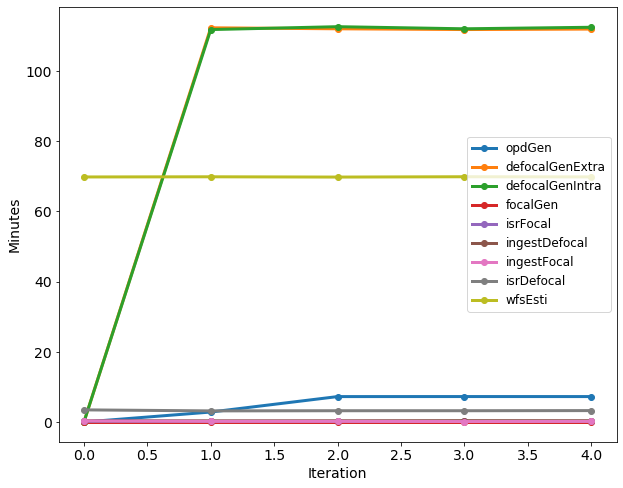

In [39]:
fig = plt.figure(figsize=(10, 8))
for key, value in timing_dict.items():
    if key != 'totalIterTime':
        plt.plot(np.arange(num_iters), np.array(value)/60., label=key, lw=3, marker='o')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

Text(0, 0.5, 'Minutes')

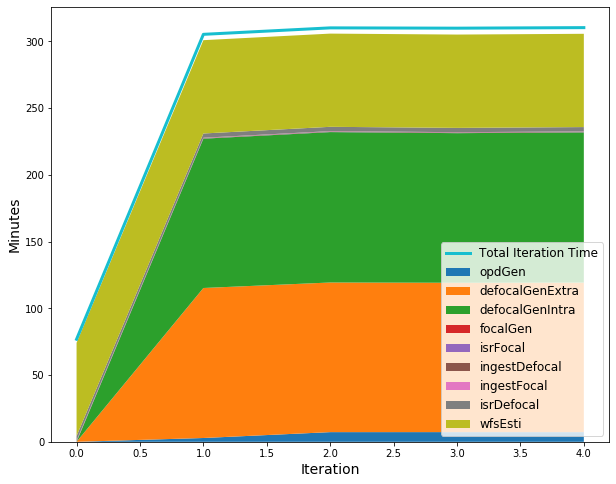

In [40]:
fig = plt.figure(figsize=(10, 8))
stack_keys = list(timing_dict.keys())
stack_keys.remove('totalIterTime')
y_data = [np.array(timing_dict[key])/60. for key in stack_keys]
plt.stackplot(np.arange(num_iters), y_data, labels=stack_keys)
plt.plot(np.arange(num_iters), np.array(timing_dict['totalIterTime'])/60., 
         lw=3, c='C9', label='Total Iteration Time')
plt.legend(fontsize=12)
plt.xlabel('Iteration', size=14)
plt.ylabel('Minutes', size=14)